0       118326
1       118609
2       118621
3       118726
4       118727
         ...  
9395      2860
9396      2860
9397      2860
9398      2601
9399      2478
Length: 9400, dtype: int64
4
             PC0       PC1       PC2       PC3
76965   0.265669 -0.391004  0.622420  0.623803
114992  0.413479 -0.566021  0.163653 -0.694171
136846  0.609656 -0.166370 -0.699388  0.333911
123469  0.621912  0.706440  0.310914 -0.132287
               76965        114992        136846        123469
76965   8.318684e+08  1.262712e+09  1.804867e+09  1.791835e+09
114992  1.262712e+09  1.971438e+09  2.817937e+09  2.789572e+09
136846  1.804867e+09  2.817937e+09  4.159898e+09  4.191625e+09
123469  1.791835e+09  2.789572e+09  4.191625e+09  4.404365e+09
           76965    114992    136846    123469
76965   1.000000  0.986019  0.970234  0.936115
114992  0.986019  1.000000  0.984007  0.946682
136846  0.970234  0.984007  1.000000  0.979263
123469  0.936115  0.946682  0.979263  1.000000
(9400, 4)
           

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


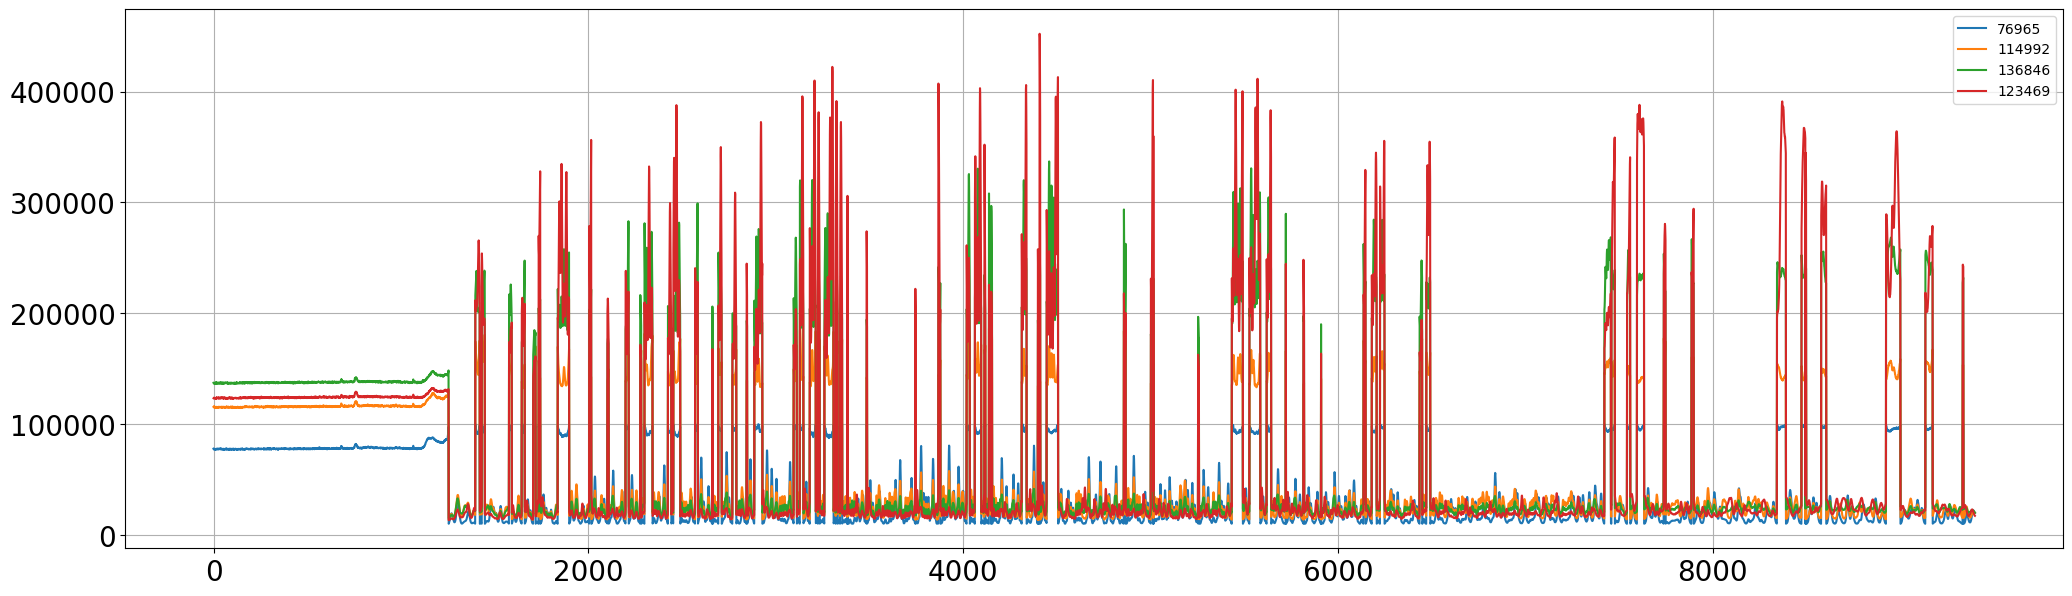

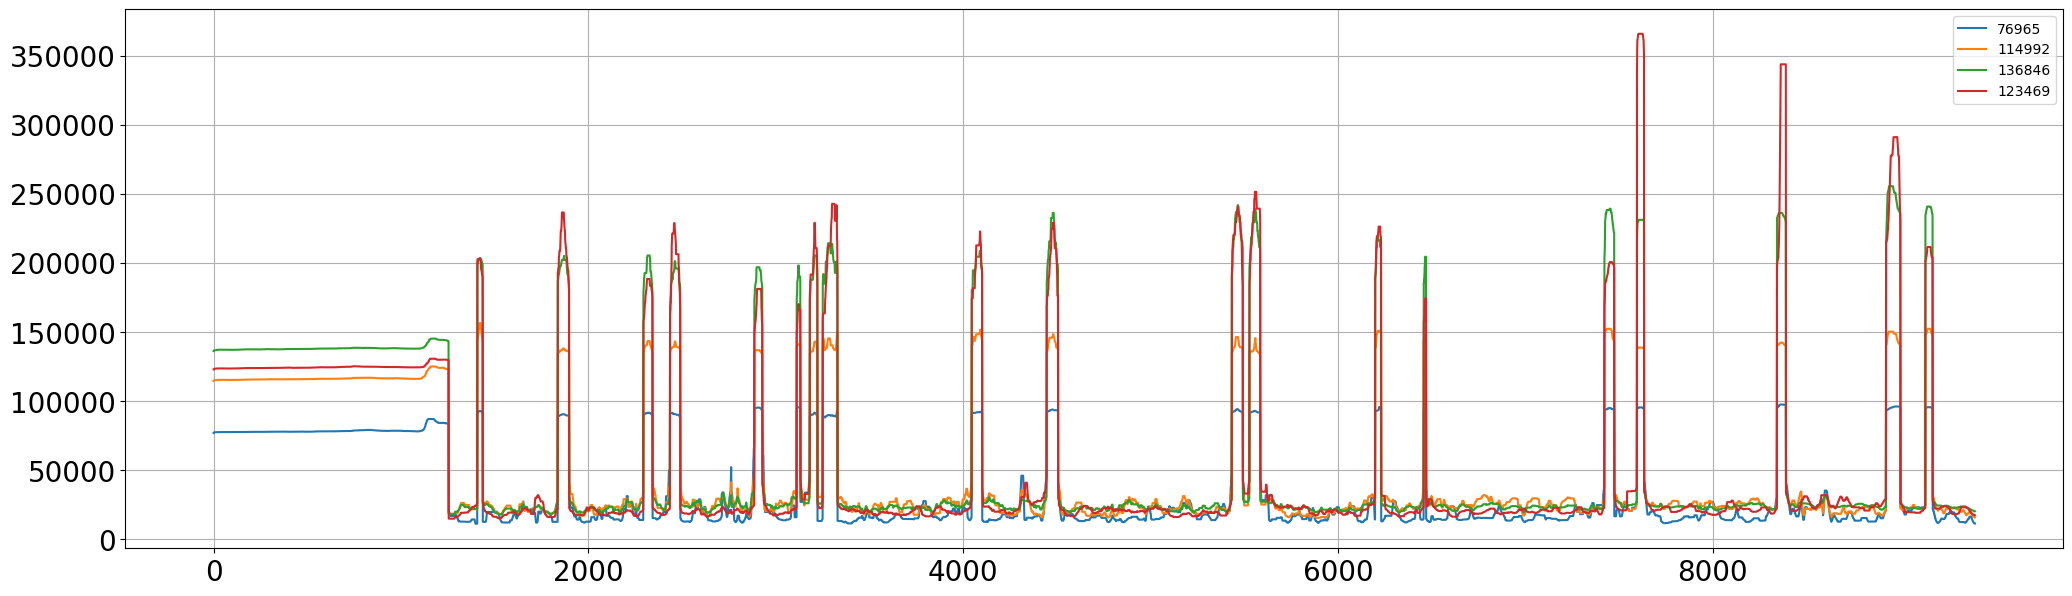

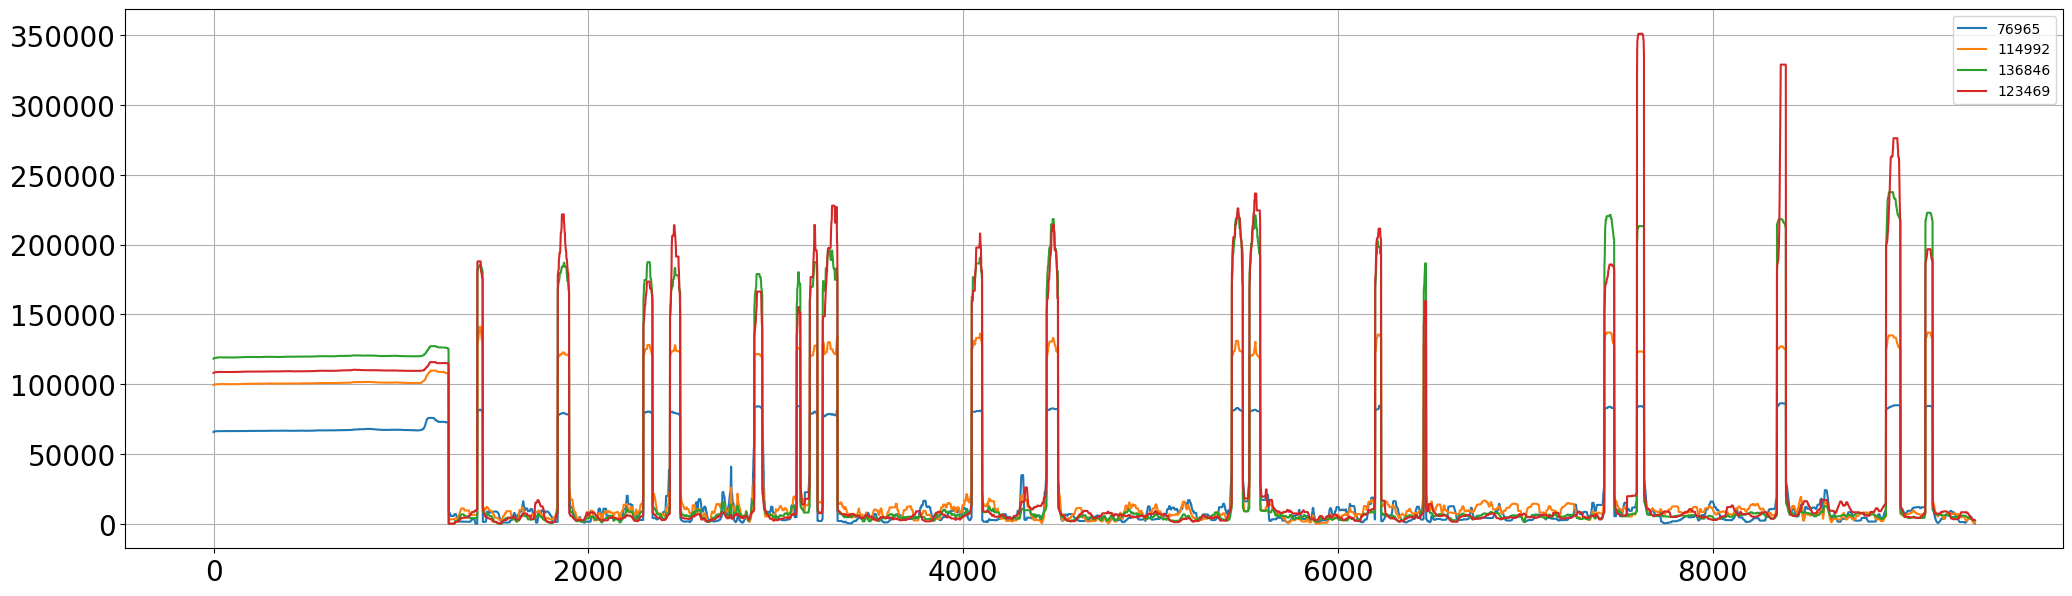

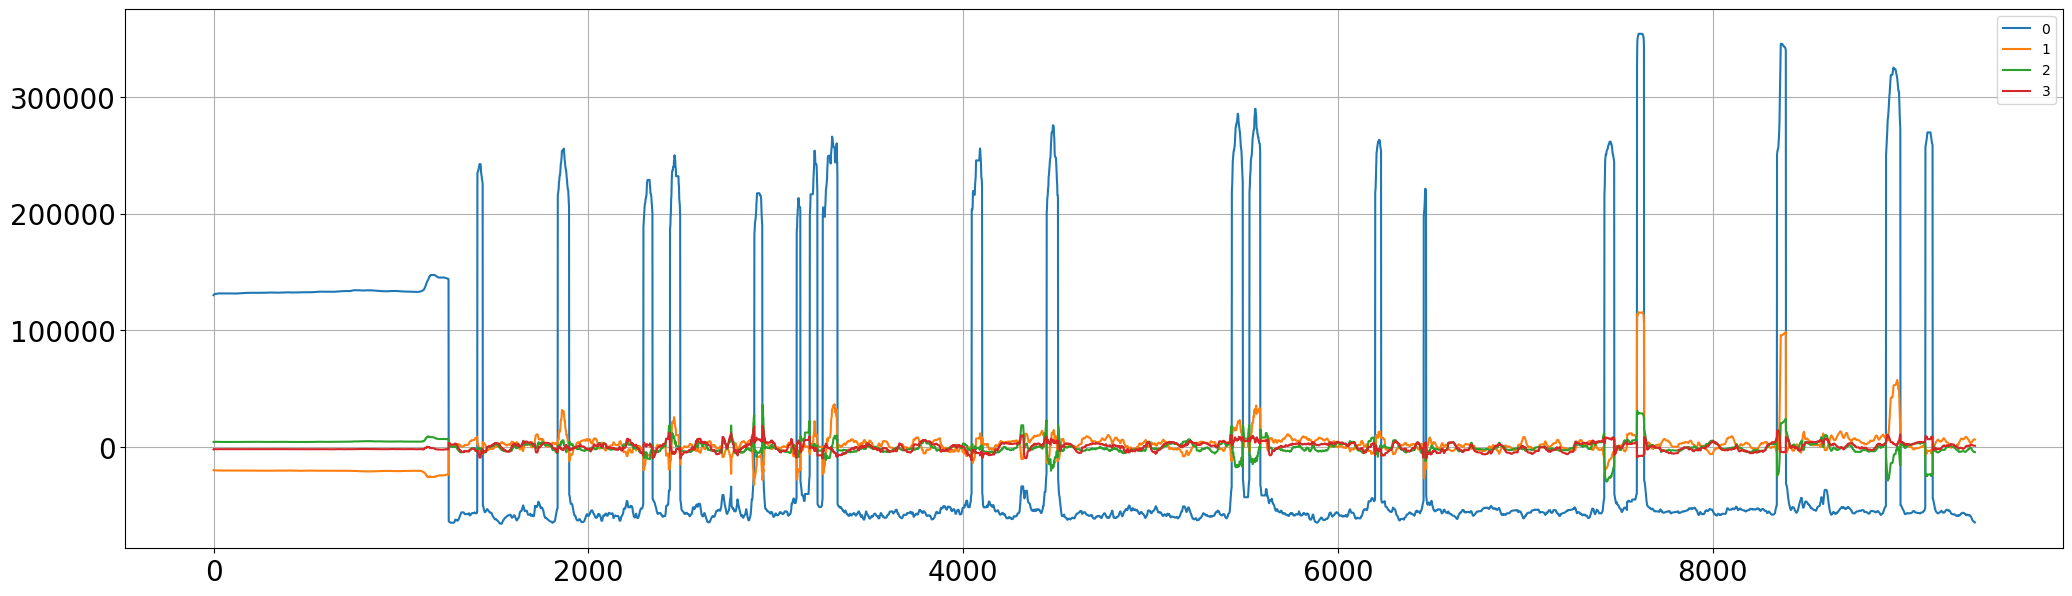

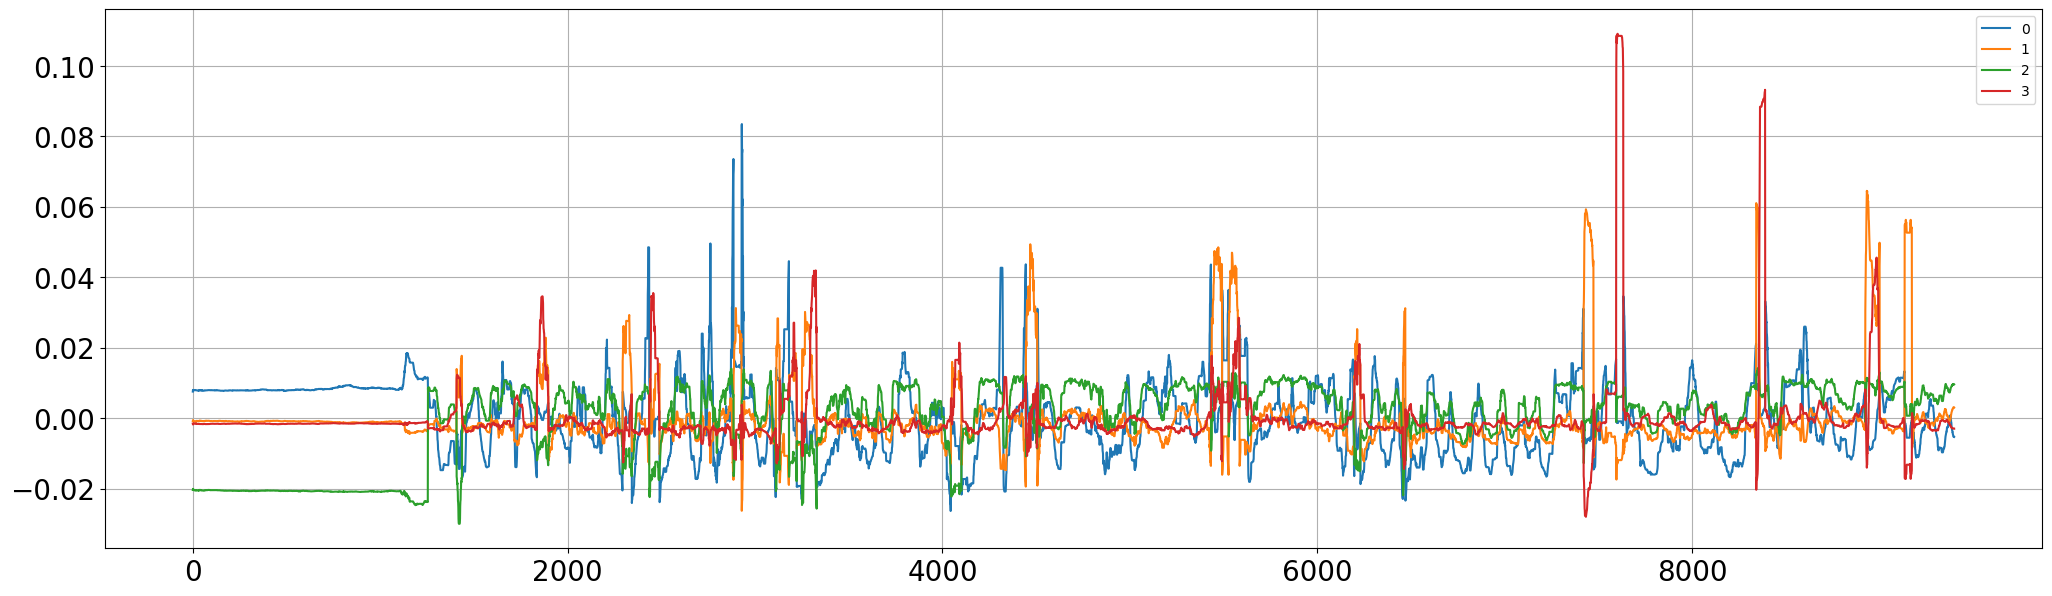

In [5]:
import os
import numpy as np
import pandas as pd 
import csv
import matplotlib.pyplot as plt
from scipy import signal
import rampy
from sklearn.decomposition import PCA,FastICA

def datreader(f):
    if os.path.splitext(f)[1]==".dat":
        data=pd.read_fwf(f)
        #print(data)
        
        
        
        return data
    
    

        
        
def main():
    data=datreader("C:/Users/evgen/Downloads/pGEM-2_A9.srd.dat")
    #исходные
    data.plot(figsize=(25,7))
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    #data.diff().plot(figsize=(25,7))
    #plt.grid(True)
    #plt.tick_params(labelsize =20,#  Размер подписи
                    #color = 'k')   #  Цвет делений
    
    
    data= data.apply(lambda x: signal.medfilt(x,55))
    data.plot(figsize=(25,7))
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    data=data-data.min()
    data.plot(figsize=(25,7))
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    
    #data.diff().plot(figsize=(25,7))
    #plt.grid(True)
    #plt.tick_params(labelsize =20,#  Размер подписи
                    #color = 'k')   #  Цвет делений
    print(data.max(axis=1))
    print(data.shape[1])
    pca = PCA(n_components=data.shape[1])
    pca.fit(data)

    
    
    # Reformat and view results
    loadings = pd.DataFrame(pca.components_.T,
    columns=['PC%s' % _ for _ in range(len(data.columns))],
    index=data.columns)
    print(loadings)
    
    #plt.figure(figsize=(25,7))
    #plt.plot(pca.explained_variance_ratio_)
    #plt.ylabel('Explained Variance',fontsize=20)
    #plt.xlabel('Components',fontsize=20)
    #plt.grid(True)
    #plt.tick_params(labelsize =20,#  Размер подписи
                    #color = 'k')   #  Цвет делений
    print(data.cov())
    print(data.corr())
    
    datapca=pd.DataFrame(pca.fit_transform(data))
    
    
    datapca.plot(figsize=(25,7))
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    print(data.shape)
    fastica = FastICA(n_components=data.shape[1])
    fastica.fit(data)

    
    
    # Reformat and view results
    loadings = pd.DataFrame(fastica.components_.T,
    columns=['IC%s' % _ for _ in range(len(data.columns))],
    index=data.columns)
    print(loadings)
    
    datafastica=pd.DataFrame(fastica.fit_transform(data))
    
    
    datafastica.plot(figsize=(25,7))
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    

    plt.show()
    
    
        
    
    
if __name__ == "__main__":
    main()